# Demo for Incremental Sampler

This notebook demonstrates the incremental random sampler.

In [3]:
%matplotlib inline

import os
from pathlib import Path

import numpy as np
import scipy

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import *

import pygestalt as gs
from pygestalt import sampler

In [4]:
outdir = Path(os.getcwd()) / 'outputs'
os.makedirs(outdir, exist_ok=True)

## Comparison of sampling methods

We compare first different methods for generating random positions of ball.

### Method 1: iid uniform sampling

Drawback: formation of clusters

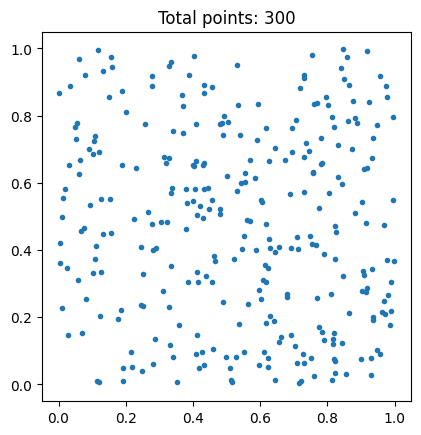

In [9]:
D = np.random.rand(300,2)
fig, ax = gs.utils.ball_plot(D)
# ax.set_axis_off()

### Method 2: random perturbation of a hexagonal grid

Depending on the amount of perturbation:
- If too few: the outcome still looks like a hex grid
- if too much: formation of clusters

In [10]:
ρ = 0.03  # 
# print(f'Radius={ρ}, Maximum number of balls={int(1/(np.pi*ρ**2))}')

N = int(1/ρ)
X, Y = np.meshgrid(np.arange(0,2*N), np.arange(-2*N,2*N))

# Hexagonal coordinates
B = np.asarray([[1,0], [0.5, np.sqrt(3)/2]]).T

H0 = np.asarray((X,Y)).reshape((2,-1)).T @ B * (2*ρ)
Hg = np.asarray([d for d in H0 if 0<=d[0]<=1 and 0<=d[1]<=1]) 

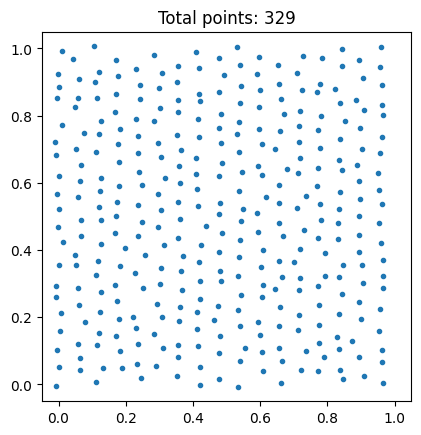

In [19]:
# change the amount of noise to see the effect of perturbation
D = Hg + np.random.randn(len(Hg),2)*ρ*0.25  # too few
# D = Hg + np.random.randn(len(Hg),2)*ρ*0.5  # too much

_ = gs.utils.ball_plot(D)

### Method 3: incremental sampling

Idea: try to randomly pack balls as many as possible inside a restricted area. 

In [20]:
sfunc = gs.sampler.box()  # random sampler
radius = 0.025  # radius of ball
thresh = 1e-3  # threshold for convergence

%time D, _ = gs.sampler.draw_positions(radius, sfunc, thresh=thresh)

CPU times: user 17 s, sys: 2.53 ms, total: 17 s
Wall time: 17 s


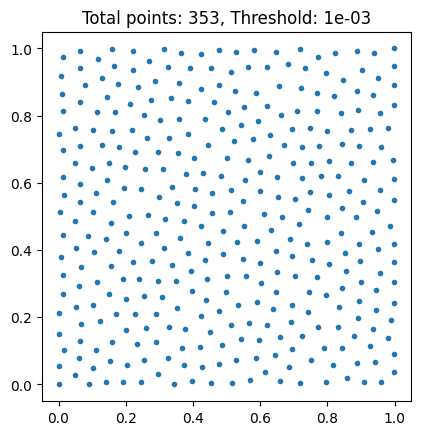

In [21]:
_ = gs.utils.ball_plot(D, thresh=thresh)

## Incremental sampling

We study the proposed method of incremental sampling.

### Effect of the threshold

The sampling becomes harder with a small threshold.

In [22]:
sfunc = gs.sampler.box()
radius = 0.1
thresh = 1e-3

%time D, _ = gs.sampler.draw_positions(radius, sfunc, thresh=thresh)

len(D)

CPU times: user 1.07 s, sys: 261 µs, total: 1.07 s
Wall time: 1.07 s


29

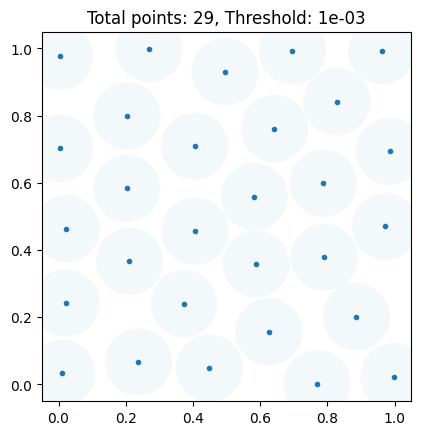

In [23]:
fig, ax = gs.utils.ball_plot(D, radius=radius, thresh=thresh)

# plt.savefig(outdir/f'thresh[{thresh:.0e}].png')

### Sampling on a restricted domain

The domain of sampling can be restricted to a curve or an area.

In [24]:
radius = 0.025
thresh = 1e-2

# First draw positions on a circle
%time C, _ = sampler.draw_positions(radius, sampler.circle(inside=False), thresh=thresh)
# Then draw background positions by excluding the circle
%time D, _ = sampler.draw_positions(radius, sampler.box(), exclusions=C, thresh=thresh)

CPU times: user 124 ms, sys: 0 ns, total: 124 ms
Wall time: 124 ms
CPU times: user 1.88 s, sys: 0 ns, total: 1.88 s
Wall time: 1.89 s


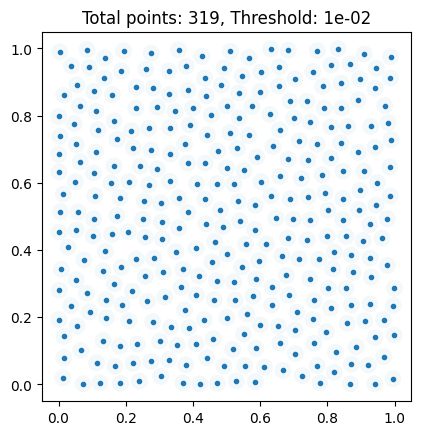

In [25]:
fig, ax = gs.utils.ball_plot(np.vstack([D, C]), radius=radius, thresh=thresh)

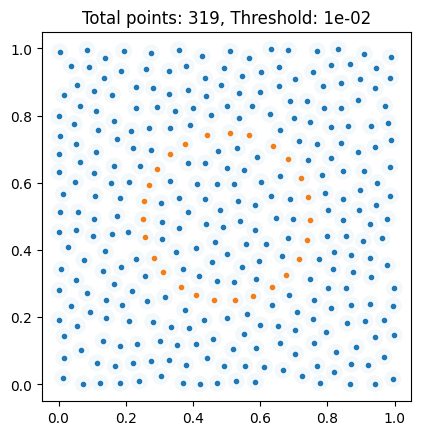

In [26]:
fig, ax = gs.utils.ball_plot(D, C, radius=radius, thresh=thresh)

#### Example with a triangle

In [27]:
P = np.asarray ([(0.25,0.25), (0.75,0.25), (0.5,0.683), (0.25,0.25)])

radius = 0.025
thresh = 1e-3

%time C, _ = sampler.draw_positions(radius, sampler.segments(P), thresh=thresh)
%time D, _ = sampler.draw_positions(radius, sampler.box(), exclusions=C, thresh=thresh)

CPU times: user 1.22 s, sys: 3.07 ms, total: 1.23 s
Wall time: 1.23 s
CPU times: user 20.8 s, sys: 987 µs, total: 20.8 s
Wall time: 20.8 s


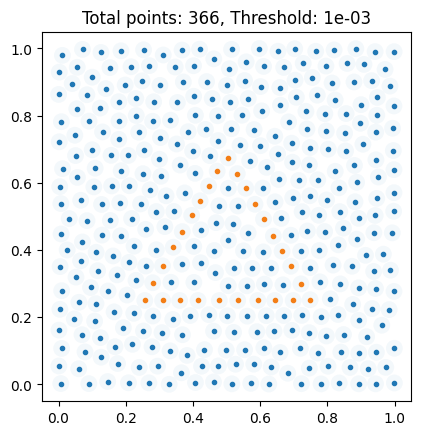

In [28]:
fig, ax = gs.utils.ball_plot(D, C, radius=radius, thresh=thresh)

### Sampling from a contour of image

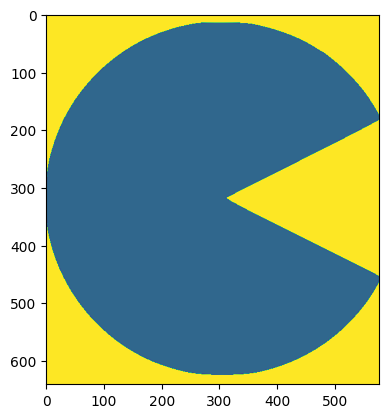

In [29]:
fname = Path('/home/han/Projects/DeepBrain/Codes/pygestalt/notebooks/images/pacman.png')
image = plt.imread(fname)

X0 = np.mean(image, axis=-1)
plt.imshow(X0, aspect='equal')

In [31]:
Xs, Hs = gs.utils.contour_from_image(X0)

Xs = Xs/X0.shape  # convert to the coordinate in the box [0,1]x[0,1]

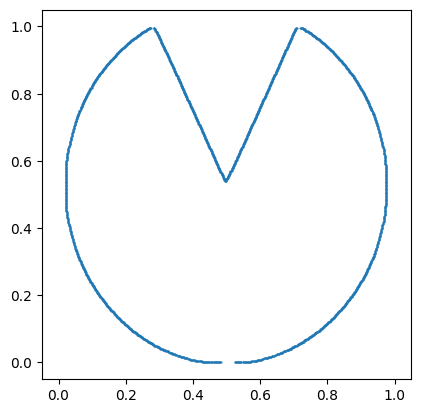

In [32]:
plt.scatter(Xs[:,0], Xs[:,1], marker='.', s=1)
ax = plt.gca()
ax.set_xlim((-0.05,1.05))
ax.set_ylim((-0.05,1.05))
ax.set_aspect('equal')   

In [36]:
radius = 0.02
thresh = 1e-3

%time C, _ = sampler.draw_positions(radius, sampler.point_set(Xs), thresh=thresh)
%time D, _ = sampler.draw_positions(radius, sampler.box(), exclusions=C, thresh=thresh)

CPU times: user 3.17 s, sys: 190 µs, total: 3.17 s
Wall time: 3.17 s
CPU times: user 32.6 s, sys: 193 µs, total: 32.6 s
Wall time: 32.6 s


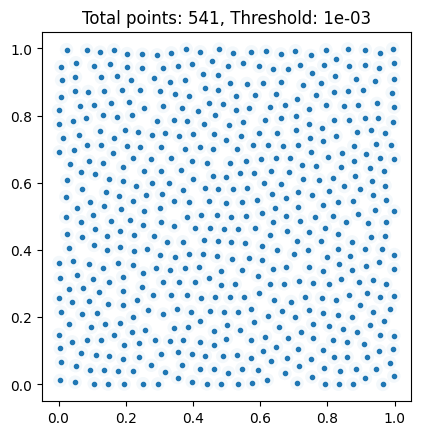

In [37]:
fig, ax = gs.utils.ball_plot(np.vstack([D,C]), radius=radius, thresh=thresh)

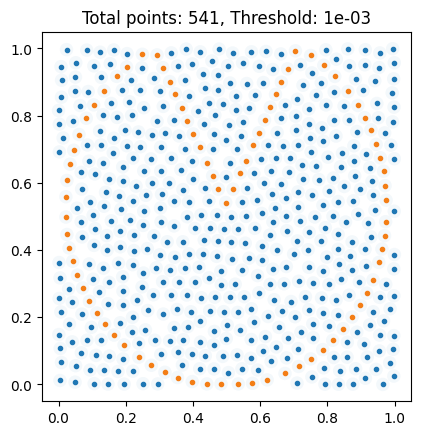

In [38]:
fig, ax = gs.utils.ball_plot(D, C, radius=radius, thresh=thresh)

# EOF